In [148]:
x=read.table("3d_id.csv1",sep=';',quote="",comment.char="");
l=read.table("labs");

labs=as.character(l[1:5,1]);
labs=c("id",labs,paste(rep(c("x","y","z"),35),rep(1:35,rep(3,35)),sep="."));
names(x)=labs;
#make NAs
for (i in 7:111) x[x[,i]==-999,i] = NA;


#now all observationas are ready
summary(x[,2:8])

      COLLECTION        GROUP                 POP     
 DONATED   :181            :716                 :635  
 TERRY     :174   white    :173   Oloriz        :130  
 OLORIZ    :130   black    : 53   black         :108  
 Morton    :124   Turkey   : 33   Hispanic_Chile: 74  
 UT_DONATED:118   Macedonia: 22   white         : 74  
           : 99   (Other)  : 74   Cuba_African  : 27  
 (Other)   :246   NA's     :  1   (Other)       : 24  
                            RACE           SEX           x.1         
                              :1001   male   :442   Min.   :-252.17  
 Hispanic_Guatamala           :  21   female :295   1st Qu.:  29.28  
 White                        :  15          :217   Median : 117.85  
 hispanic_panama              :   8   M      : 48   Mean   :  83.27  
 hispanic_peru                :   8   ?      : 43   3rd Qu.: 160.11  
 hispanic_panama_afroantillean:   6   F      :  9   Max.   : 332.60  
 (Other)                      :  13   (Other): 18   NA's   :15       


These are basic stats. The first component of the first variable is all over the place, presumably the rotation invariant of the coordinates is needed for comparison.

In [149]:
#only 111 observations are complete?
table(is.na(apply(x[,7:111],1,sum)))


FALSE  TRUE 
  111   961 

We need to align (register) the measurements. This can be separated into three steps:
    - selecting origin
    - aligning two axis
    - possibly rescaling

Without loss of generality lets pick  the back of the cranium (point Lambda or number 16) as the origin. Other options may be better, e.g., centroid, but it is easier to explain.

In [150]:
#separate covariates
y=x[,1:7];

#now these are mostly non-missing measures
vs1 = c(0:4,8:15,16:19,26:33);
lambda = c(3*15,3*15+1,3*15+2)+7;
for (i in vs1){
  to = c(3*i,3*i+1,3*i+2)+7;
  y=cbind(y,x[,to]-x[,lambda]);
}
#Make sure all are non-nissing
sel = !is.na(apply(y[,-c(1:7)],1,sum));
table(sel)

sel
FALSE  TRUE 
  164   908 

In [151]:
# is there any pattern?
summary(x[sel,lambda])

      x.16              y.16              z.16       
 Min.   :-172.20   Min.   :-335.00   Min.   : 10.58  
 1st Qu.:  21.28   1st Qu.:-198.48   1st Qu.:151.14  
 Median :  65.10   Median :  34.86   Median :188.49  
 Mean   :  64.84   Mean   :  12.50   Mean   :175.78  
 3rd Qu.: 132.65   3rd Qu.: 202.01   3rd Qu.:214.51  
 Max.   : 267.95   Max.   : 439.57   Max.   :298.77  

Origin may be less varying if we pick one measurer/one apparatus, so it might help identifying who did the measurement

Lets align the first axis based on the point lammda and nasion (20)

In [152]:
#nasion
nas = c(3*18,3*18+1,3*18+2)+7;
#frontomalare temporale
fmtr = c(3*13,3*13+1,3*13+2)+7;
fmtl = c(3*12,3*12+1,3*12+2)+7;
#top of cranium: bregma
brg = c(3*3,3*3+1,3*3+2)+7;

In [153]:
summary(x[sel,nas]-x[sel,lambda])
summary(x[sel,fmtr]-x[sel,fmtl])

      x.19                y.19                z.19        
 Min.   :-147.2750   Min.   :-171.2530   Min.   :  3.955  
 1st Qu.:  -0.0155   1st Qu.: -16.1137   1st Qu.: 99.538  
 Median :  15.2730   Median :  -1.7840   Median :158.024  
 Mean   :  26.4855   Mean   :   0.1674   Mean   :132.064  
 3rd Qu.:  40.6343   3rd Qu.:   9.5370   3rd Qu.:171.782  
 Max.   : 183.1630   Max.   : 156.8900   Max.   :202.380  

      x.14              y.14               z.14         
 Min.   :-113.32   Min.   :-115.842   Min.   :-19.6610  
 1st Qu.: -12.31   1st Qu.:-100.887   1st Qu.: -4.6490  
 Median :  10.71   Median : -94.003   Median : -1.6520  
 Mean   :  11.98   Mean   : -53.521   Mean   : -1.6654  
 3rd Qu.:  40.45   3rd Qu.:  -0.912   3rd Qu.:  0.6162  
 Max.   : 110.59   Max.   : 103.769   Max.   : 19.1960  

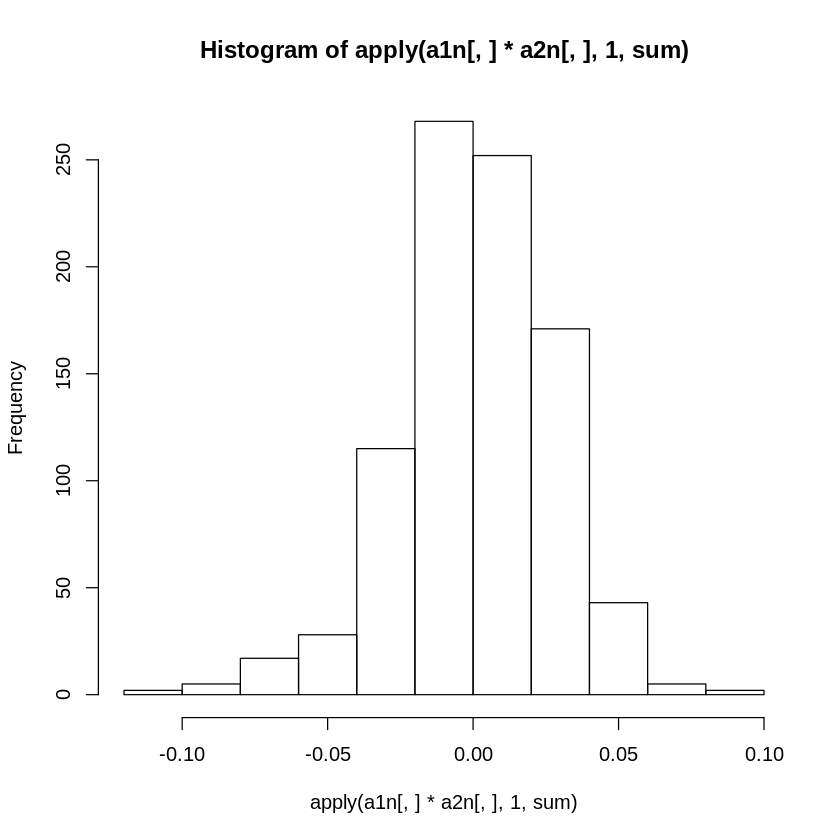

In [154]:
x0 = x[sel,];
#Rotate all vectors nas-lambda to align with (1,0,0)
#Rotate all vectors fmtr-fmtl to align with (0,1,0)
a1=x0[,nas]-x0[,lambda]
a2=x0[,fmtr]-x0[,fmtl]
#normalize
a1n = a1/sqrt(apply(a1*a1,1,sum)) 
a2n = a2/sqrt(apply(a2*a2,1,sum)) 
#lets see if these are orthogonal
hist(apply(a1n[,]*a2n[,],1,sum))

The axes are not orthogonal, how bad the measuremeent must be?
  - Pick another candidate pair?
  - Garbage data?
  - Make rotation around lambda-nasion axis?


In [155]:
# a set that is quite orthogonal
ss = abs(apply(a1n[,]*a2n[,],1,sum))<.001
ss=(1:dim(x0)[1])[ss]
length(ss)

#bad, not orthogonal
sbad = apply(a1n[,]*a2n[,],1,sum)< -.1
sbad=(1:dim(x0)[1])[sbad]
sbad

[1] 30

[1] 126 411

$x
[1]  0.8364833  2.4982667  3.7806633 -0.1783367  3.5360167

$y
[1] 21.80723 21.05017 16.66193 16.05773 19.78722

x.4,y.4,z.4
110.715,162.669,381.032
225.845,201.118,340.258
202.314,95.937,322.614
68.504,172.905,259.218
230.4,144.319,352.865


,id,COLLECTION,GROUP,POP,RACE,SEX,x.1,y.1,z.1,x.2,...,z.32,x.33,y.33,z.33,x.34,y.34,z.34,x.35,y.35,z.35
150,NC95-054,FORENSIC,,,Hispanic_mexico,male,144.084,50.676,246.182,248.162,...,349.052,183.256,56.491,367.791,236.102,53.313,359.556,NA,NA,NA


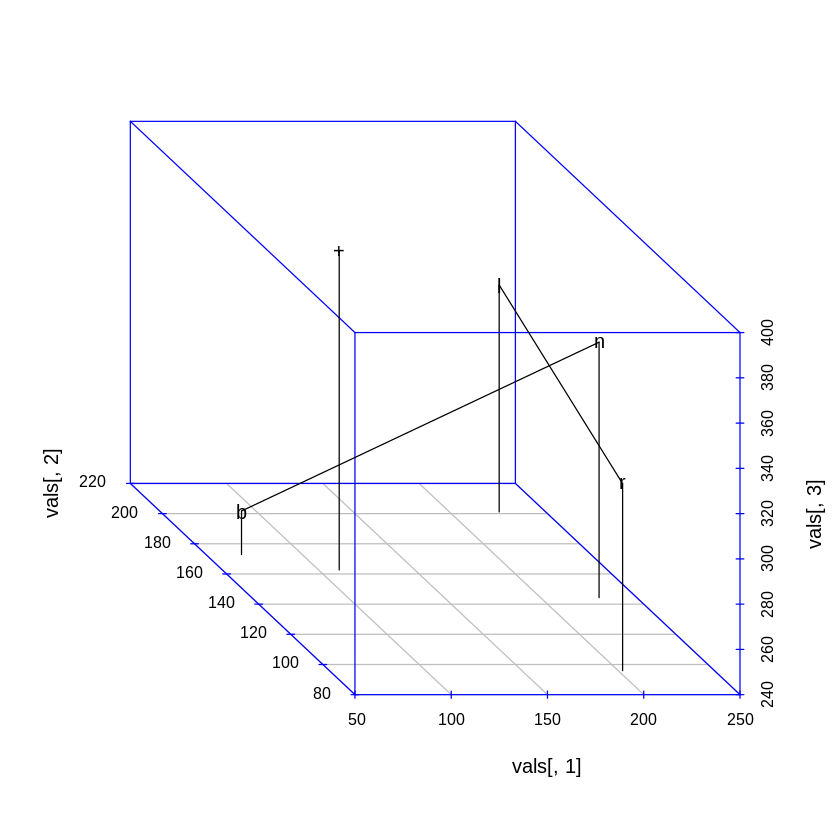

In [131]:
library("scatterplot3d")
#one of the worst
vals=c();
for (m in c(3,12,13,15,18)){
  to = c(3*m,3*m+1,3*m+2)+7;
  vals = rbind(vals,unclass(x0[126,to]));
}
p3d=scatterplot3d(vals[,1], vals[,2], vals[,3],type="h",pch=c("+","l","r","b","n"),
                  highlight.3d = F,  angle = 120,
                  col.axis = "blue")
p3d.coords <- p3d$xyz.convert(vals[,1], vals[,2], vals[,3])
p3d.coords
lines(p3d.coords$x[4:5],p3d.coords$y[4:5])
lines(p3d.coords$x[2:3],p3d.coords$y[2:3])

vals
x0[128,]

This is appears to be problematic, top to the left side really non-perpendicular. This appears to be a deformed cranium or a problematic measurement

In [137]:
# Below assumes that a1n and a2n are orthogonal, i.e., cranium is symmetric
xtr = x0;

v1 = as.double(matrix(c(1,0,0)));
v2 = as.double(matrix(c(0,1,0)));

for (j in 1:dim(x0)[1]){
#for (j in ss){
  v = as.double(matrix(a1n[j,],nrow=3));
  a=v1+v
  r1 = 2/(t(a)%*%a)[1,1]*(a%*%t(a)) - matrix(c(1,0,0,0,1,0,0,0,1),ncol=3);
  #print(r1%*%t(r1))  
  #go over all measurements
  for (i in vs1){
    to = c(3*i,3*i+1,3*i+2)+7;
    var=(x0[j,to]-x0[j,lambda]); #translate    
    #var=(x0[j,to]); #translate    
    varR = as.double(matrix(var,nrow=3))%*%r1; #rotate
    xtr[j,to] = varR
  }
}
xtr2 = xtr;
a22=xtr[,fmtr]-xtr[,fmtl]
a2n = a22/sqrt(apply(a22*a22,1,sum)) 
for (j in 1:dim(x0)[1]){
#for (j in ss){
  v = as.double(matrix(a2n[j,],nrow=3));
  #fix to do rotation around v1 axis  
  v = v*c(0,1,1)
  v = v / sqrt(sum(v*v))  
  a=v2+v
  r2 = 2/(t(a)%*%a)[1,1]*(a%*%t(a)) - matrix(c(1,0,0,0,1,0,0,0,1),ncol=3);
  for (i in vs1){
    to = c(3*i,3*i+1,3*i+2)+7;  
    varR = as.double(matrix(xtr[j,to],nrow=3))%*%r2; #rotate
    xtr2[j,to] = varR
  }
}
    

x.4,y.4,z.4
-87.56586,1.659549,71.30725
-159.6873,-54.35151,-9.207805
-159.5812,54.60024,-9.207805
0,0,0
-181.2727,-6.842012e-16,7.91459e-15


,x.4,y.4,z.4
vv,-93.2599,-1.156075,73.46871
vv,-161.2803,-53.02448,-4.379271
vv,-161.234,50.3975,-4.379271
vv,0,0,0
vv,-180.2689,-1.385267e-14,9.013697e-15


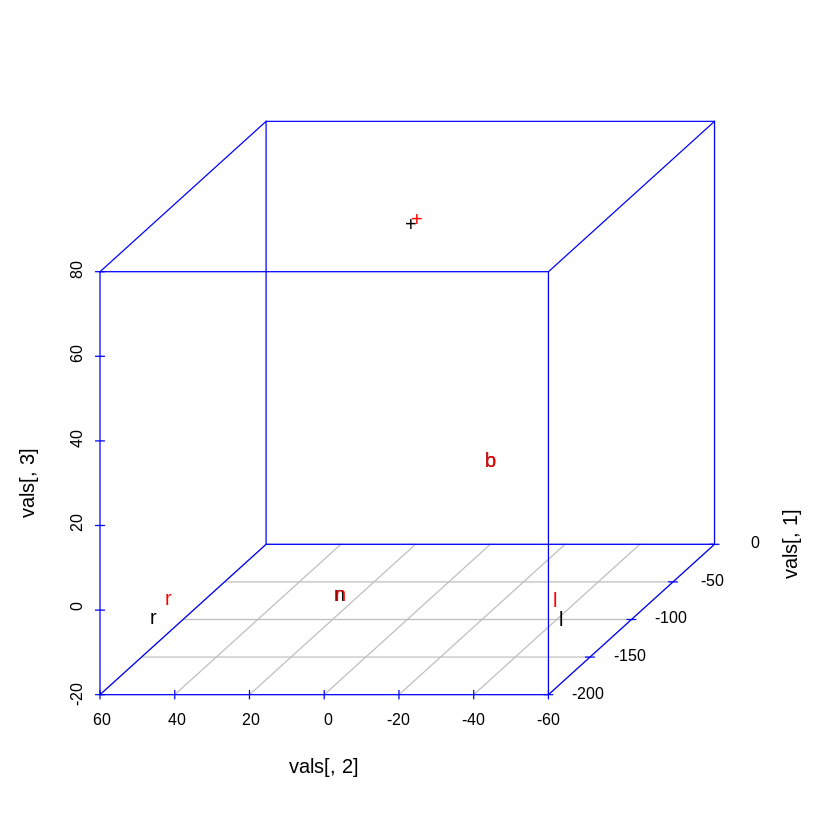

In [138]:
vals=c();
vals1=c();
for (m in c(3,12,13,15,18)){
  to = c(3*m,3*m+1,3*m+2)+7;
  vals = rbind(vals,unclass(xtr2[ss[1],to]));
}
for (m in c(3,12,13,15,18)){
  to = c(3*m,3*m+1,3*m+2)+7;
  vv = unclass(xtr2[ss[2],to]*c(1,1,1));
  vals1 = rbind(vals1,vv);
}

p3d=scatterplot3d(vals[,1], vals[,2], vals[,3],pch=c("+","l","r","b","n"),
                  highlight.3d = F,  angle = 220,
                  col.axis = "blue")


p3d$points(vals1[,1], vals1[,2], vals1[,3],pch=c("+","l","r","b","n"),col="red")
vals
vals1

In [172]:
#looks like we managed to align crania
#Lets scale it
xscale = abs(xtr2[,nas][,1]);
yscale = sqrt(apply((xtr2[,fmtr] - xtr2[,fmtl])^2,1,sum));
zscale = sqrt(apply((xtr2[,brg] - xtr2[,nas]/c(2,1,1))^2,1,sum));

In [173]:
xsc=xtr2;
for (j in 1:dim(x0)[1]){
  for (i in vs1){
    to = c(3*i,3*i+1,3*i+2)+7;  
    var = as.double(matrix(xtr2[j,to],nrow=3))/c(xscale[j],yscale[j],zscale[j]); #scale
    xsc[j,to] = var
  }
}

In [201]:
vars = c();
for (i in vs1) vars = c(vars, c(3*i,3*i+1,3*i+2)+7) 
ev = prcomp(xsc[,vars])$sdev;
(cumsum(ev)/sum(ev))[1:28];

[1] 0.2791061 0.3306504 0.3724726 0.4065820 0.4378467 0.4670828 0.4952921
 [8] 0.5213453 0.5426891 0.5637101 0.5842570 0.6037758 0.6217969 0.6388108
[15] 0.6547512 0.6699021 0.6838587 0.6976552 0.7105532 0.7229182 0.7351827
[22] 0.7468555 0.7578370 0.7687133 0.7792347 0.7894499 0.7994388 0.8090872

In [208]:
#28 top eigenvalues explain 80% of the variance
useful = c()
for (i in 1:28){
 cmp1=abs(prcomp(xsc[,vars])$rotation[,i])>.25
 print(names(cmp1)[cmp1])
 for (n in names(cmp1)[cmp1]) useful = c(useful, n)
}
useful=names(table(useful))    

[1] "z.3"  "z.4"  "z.17" "z.18" "z.27" "z.31" "z.32"
[1] "z.1"  "z.2"  "z.4"  "z.27"
[1] "z.4"
[1] "y.1"  "y.2"  "y.17" "y.18"
[1] "y.2"  "z.3"  "y.18"
[1] "y.1"  "z.1"  "z.3"  "y.17" "y.20"
[1] "z.2"
[1] "z.4"  "z.12" "z.20" "z.27"
[1] "y.1"  "z.3"  "z.17" "z.18"
[1] "y.31" "y.33" "y.34"
[1] "y.2"  "z.4"  "y.34"
[1] "z.1"  "z.2"  "y.4"  "z.17" "z.32"
[1] "y.1"  "z.3"  "y.18"
[1] "z.27" "z.31" "z.32"
[1] "x.1"  "y.4"  "y.32"
[1] "y.20" "z.30"
[1] "z.28" "z.29"
[1] "x.4"  "y.20"
[1] "x.4"  "y.20" "y.33"
[1] "y.4"  "z.30" "y.31"
[1] "z.1"  "z.2"  "y.4"  "z.30"
[1] "x.18" "x.20" "x.27" "x.30" "y.32"
[1] "z.1"  "z.2"  "z.9"  "z.15" "x.30"
[1] "z.10" "y.17" "y.31" "y.32"
[1] "x.2"  "x.17" "y.33"
[1] "z.15" "x.30" "y.30"
[1] "x.1"  "y.4"  "y.17" "y.34"
[1] "y.2"  "z.5"  "z.17" "z.30"


In [213]:
#now that we rescaled, can we detect females?
xsc$male = xsc[,6]=='male'
fmla=paste('male~',paste(useful,collapse="+"), sep="");
mod=glm(as.formula(fmla),data=xsc,family=binomial)

In [215]:
# works, but not great
summary(mod)


Call:
glm(formula = as.formula(fmla), family = binomial, data = xsc)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2184  -0.8951  -0.4659   0.9845   2.7379  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -7.2853     5.2806  -1.380 0.167701    
x.1           2.3145     4.7909   0.483 0.629031    
x.17         -3.9839     5.7445  -0.694 0.487983    
x.18         -7.3629     5.4624  -1.348 0.177684    
x.2          10.8479     4.6046   2.356 0.018478 *  
x.20         53.3917     9.8204   5.437 5.42e-08 ***
x.27        -39.6165     8.9012  -4.451 8.56e-06 ***
x.30         -4.1651     4.0391  -1.031 0.302442    
x.4          -0.9406     3.1972  -0.294 0.768605    
y.1          10.6905     3.8413   2.783 0.005385 ** 
y.17         -5.0859     4.0714  -1.249 0.211601    
y.18          1.2701     3.9171   0.324 0.745746    
y.2           5.0639     3.7431   1.353 0.176104    
y.20          0.0579     2.7475   0.021 0.983188    
y.30  

In [217]:
table(xsc[,3])


                               -999          Albanian                C? 
              621                 7                 2                 1 
               H?          Hispanic     Hispanic_cuba         Macedonia 
                1                 2                18                16 
Southern_Yugoslav      Spain-Basque            Turkey         Umatilla? 
                6                 0                17                 1 
  Yugoslav_Bosnia        Yugoslavia              arch             black 
                0                 7                 0                48 
          unknown             white         whitehite 
                3               154                 4 

In [220]:
#now that we rescaled, can we detect "white"?
xsc$white = xsc[,3]=='white'
fmla=paste('white~',paste(useful,collapse="+"), sep="");
mod=glm(as.formula(fmla),data=xsc,family=binomial)
# works, but not great
summary(mod)


Call:
glm(formula = as.formula(fmla), family = binomial, data = xsc)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.4468  -0.3813  -0.1582  -0.0422   3.4540  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  19.3727     8.2319   2.353 0.018604 *  
x.1          -2.3611     7.0474  -0.335 0.737597    
x.17        -41.3381     9.1810  -4.503 6.71e-06 ***
x.18          9.6990     8.4741   1.145 0.252400    
x.2          11.4227     7.0615   1.618 0.105751    
x.20         29.3342    14.6621   2.001 0.045427 *  
x.27         -9.5383    13.3113  -0.717 0.473648    
x.30         29.3923     6.7138   4.378 1.20e-05 ***
x.4           0.2948     5.1678   0.057 0.954507    
y.1          -5.3333     5.7710  -0.924 0.355408    
y.17         -9.3570     6.4412  -1.453 0.146310    
y.18          4.1357     6.1126   0.677 0.498673    
y.2           7.6844     5.8620   1.311 0.189894    
y.20          0.8693     4.9580   0.175 0.860812    
y.30  

In [221]:
# better than male/female?